## Imports 

In [1]:
import time 
from functools import wraps
import warnings

# Topics in this notebook 

## Decorators 

In [2]:
def hello():
    print("hello world")

def add(a, b):
    return a + b

def greet(name, message = "Hello"):
    print(f"{message} {name}")

def fibonaaci(n):
    if n <= 1:
        return n
    return fibonaaci(n - 1) + fibonaaci(n - 2)

def factorial(n):
    if n == 0:
        return 1
    return n * factorial(n - 1)

In [3]:
#basic decorator
def measure_time(func):
    def wrapper():
        start = time.time()
        func()
        end = time.time()
        print("Execution Time: ", end-start , "seconds")
    return wrapper

#decorator with arguments
def timer(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"Execution time of {func.__name__}: {end - start} seconds")
        return result
    return wrapper

def debug(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        print(f"Calling {func.__name__} with args: {args} and kwargs: {kwargs}")
        result = func(*args, **kwargs)
        print(f"{func.__name__} returned: {result}")
        return result
    return wrapper

def memoize(func):
    cache = {}
    @wraps(func)
    def wrapper(*args):
        if args in cache:
            return cache[args]
        else:
            result = func(*args)
            cache[args] = result
            return result
    return wrapper



def deprecated(func):
    """
    A decorator that issues a warning when the decorated function is called,
    indicating that the function is deprecated and may be removed in future versions.
    """
    def wrapper(*args, **kwargs):
        warnings.warn(f"'{func.__name__}' is deprecated and may be removed in future releases.", DeprecationWarning, stacklevel=2)
        return func(*args, **kwargs)
    return wrapper

def retry(max_attempts, delay):
    """
    A decorator that attempts to execute the decorated function up to a maximum number of attempts,
    waiting for a specified delay between attempts, in case of exceptions.
    """
    def decorator(func):
        def wrapper(*args, **kwargs):
            for attempt in range(max_attempts):
                try:
                    return func(*args, **kwargs)
                except Exception as e:
                    print(f"Attempt {attempt + 1} of {max_attempts} failed. Retrying in {delay} seconds...")
                    time.sleep(delay)
            raise Exception(f"Failed after {max_attempts} attempts.")
        return wrapper
    return decorator

def valid_output(output): pass

def validate_output(func):
    """
    A decorator that checks the validity of a function's output. If the output does not meet
    predefined criteria, it raises an error, ensuring that only valid results are processed further.
    """
    def wrapper(*args, **kwargs):
        output = func(*args, **kwargs)  # Execute the function
        if valid_output(output):  # Check if the output is valid
            return output  # Return valid output
        else:
            raise ValueError("Output validation failed. Review your function's logic.")

    return wrapper

def log_results(func):
    """
    A decorator that captures and logs the result of the decorated function's execution.
    It appends the function name and its result to a log file, aiding in result tracking
    and analysis for debugging or monitoring purposes.
    """
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)  # Execute the function and capture the result
        with open("results.log", "a") as log_file:  # Open the log file in append mode
            log_file.write(f"Function {func.__name__} - Result: {result}\n")  # Log the result
        return result  # Return the original result

    return wrapper

def suppress_errors(func):
    """
    A decorator designed to catch and report any exceptions that occur during the execution
    of the decorated function, preventing them from halting the program. Instead of stopping
    execution, it logs the error and returns None.
    """
    def wrapper(*args, **kwargs):
        try:
            return func(*args, **kwargs)
        except Exception as error:
            print(f"An error occurred in {func.__name__}: {error}")
            return None  # Return None to indicate an error was handled

    return wrapper

In [4]:
#let's apply decorators

@timer
def hello():
    print("hello world")

@debug 
def greet(name, message = "Hello"):
    print(f"{message} {name}")

@debug 
def add(a, b):
    return a + b

@timer
def fibonaaci(n):
    if n <= 1:
        return n
    return fibonaaci(n - 1) + fibonaaci(n - 2)

@timer
def factorial(n):
    if n == 0:
        return 1
    return n * factorial(n - 1)




In [5]:
def add_exclamation(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        return result + "!"
    return wrapper

@add_exclamation
def greet(name):
    return f"Hello {name}"

greet("Alice")

'Hello Alice!'

In [6]:
hello()

hello world
Execution time of hello: 0.0 seconds


In [7]:
greet('Alice')
add(2, 3)

Calling add with args: (2, 3) and kwargs: {}
add returned: 5


5

In [8]:
@memoize
def fibonaaci(n):
    if n <= 1:
        return n
    return fibonaaci(n - 1) + fibonaaci(n - 2)

In [9]:
%%time
fibonaaci(10)

CPU times: total: 0 ns
Wall time: 0 ns


55

In [10]:
# reverse decorator , we can remove the decorator from the function using __wrapped__ attribute
greet.__wrapped__('Alice')

'Hello Alice'

## Property decorator

property decorator allows us to define a method but we can access it like an attribute.


In [1]:
class Person:
    def __init__(self, name):
        self._name = name

    @property
    def name(self):
        return self._name

    @name.setter
    def name(self, value):
        if not isinstance(value, str):
            raise TypeError('Name must be a string.')
        self._name = value

p = Person('John')
print(p.name)  # Output: John

p.name = 'Jane'  # This will call the setter method
print(p.name)  # Output: Jane

try:
    p.name = 123  # This will raise a TypeError
except TypeError as e:
    print(e)  # Output: Name must be a string.

John
Jane
Name must be a string.


In [2]:
class Student:
    def __init__(self, name):
        self.__name = name

    @property
    def name(self):
        return self.__name
    
    @name.setter
    def name(self, value):
        self.__name=value
    
    @name.deleter   #property-name.deleter decorator
    def name(self):
        print('Deleting..')
        del self.__name

std = Student('Steve')
del std.name
print(std.name)  #AttributeError

Deleting..


AttributeError: 'Student' object has no attribute '_Student__name'

## at Vs loc in Pandas

In [7]:
import pandas as pd
import numpy as np

# generate an array of size 5 of ints
df = pd.DataFrame(np.random.randint(0, 10, size=(10**4, 2)), columns=list('ab'))
df.head()

,a,b
0,1,8
1,9,2
2,4,9
3,2,2
4,2,7


In [6]:
%%time
df['c'] = df['a'] + df['b']

CPU times: total: 0 ns
Wall time: 631 µs


In [8]:
%%timeit
df['c'] = df['a'] + df['b']

160 µs ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


- *at , iat for scalar access and assignment*
- *loc, iloc for slicing and indexing*

In [12]:
print(df.at[0, 'a'])
print(df.iat[0,0])

try:
    df.at[:3,'a']
except Exception as e:
    print("Not valid Operation")

df.loc[0:3, 'a']

2
2
Not valid Operation


0    2
1    9
2    8
3    4
Name: a, dtype: int32

In [9]:
%%time
for index , row in df.iterrows():
    df.at[index, 'd'] = row['a'] + row['b']

CPU times: total: 328 ms
Wall time: 581 ms


In [10]:
%%timeit
for index , row in df.iterrows():
    df.loc[index, 'e'] = row['a'] - row['b']

1.66 s ± 74.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Using pipe from toolz

In [16]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# 1. filter out odd numbers 
# 2. multiply each number by 10
# 3. add 5 to each number
# 4. calculate the average
average = sum(map(lambda n: n + 5, map(lambda n: n * 10, filter(lambda n: n % 2 == 0, numbers)))) / len(numbers)
print(average)

32.5


In [11]:
from toolz import pipe
from numpy import random

In [12]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## wrong code
# average = pipe(numbers, 
               #filter(lambda n: n % 2 == 0), 
               #map(lambda n: n * 10), 
               #map(lambda n: n + 5), 
               #lambda x: sum(x) / len(x))
#print(average)

average = pipe(numbers,
                lambda x: filter(lambda n: n % 2 == 0, x),
                lambda x: map(lambda n: n * 10, x),
                lambda x: map(lambda n: n + 5, x),
                lambda x: sum(x) / len(numbers))
print(average)

32.5


In [20]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
my_pipe = pipe(numbers,
               lambda x: filter(lambda n : n%3==0, x),
               lambda x: map(lambda n : n*10, x),
                lambda x: reversed(list(x)),
)

list(my_pipe)

[90, 60, 30]

In [25]:
city_list = ["New York", "Manchester", "California", "Munich", "Bombay", 
             "Sydeny", "London", "Moscow", "Dubai", "Tokyo"]

job_list = ["Software Development Engineer", "Research Engineer", 
            "Test Engineer", "Software Development Engineer-II", 
            "Python Developer", "Back End Developer", 
            "Front End Developer", "Data Scientist", 
            "IOS Developer", "Android Developer"]

cmp_list = ["Amazon", "Google", "Infosys", "Mastercard", "Microsoft", 
            "Uber", "IBM", "Apple", "Wipro", "Cognizant"]

data = []
for i in range(1000):
  
    company = random.choice(cmp_list)
    job = random.choice(job_list)
    city = random.choice(city_list)
    salary = int(round(np.random.rand(), 3)*10**6)
    employment = random.choices(["Full Time", "Intern"], weights=(80, 20))[0]
    rating = round((np.random.rand()*5), 1)
    
    data.append([company, job, city, salary, employment, rating])
    
data = pd.DataFrame(data, columns=["Company Name", "Employee Job Title",
                                   "Employee Work Location",  "Employee Salary", 
                                   "Employment Status", "Employee Rating"])

## One-liners in Pandas

#### nlargest and nsmallest
*When duplicate values exist, we need to specify which particular row(s) we want in the final output. This is done using the keep argument that can take the following values:*

- keep = "first": prioritizes the first occurrence.
- keep = "last": prioritizes the last occurrence.
- keep = "all": Does not drop any duplicates, even if it means selecting more than n items (like in the image above).

In [28]:
# nlargest
data.nlargest(10, "Employee Salary" , keep='first')
#=> nlargest(n, column_name , keep='first')

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
763,Apple,Research Engineer,Bombay,999000,Full Time,0.3
831,Wipro,Test Engineer,Tokyo,997000,Intern,1.7
141,Cognizant,Data Scientist,Moscow,996000,Intern,0.9
42,Wipro,Test Engineer,Moscow,995000,Intern,0.3
493,Google,Data Scientist,Tokyo,995000,Full Time,1.0
244,Infosys,Test Engineer,Tokyo,994000,Intern,0.9
539,Mastercard,Back End Developer,California,994000,Intern,2.1
473,Wipro,Data Scientist,Manchester,992000,Full Time,4.8
262,Microsoft,Research Engineer,Dubai,987000,Full Time,5.0
927,Microsoft,Test Engineer,Dubai,987000,Full Time,2.9


### Cross-Tabulation
*Crosstab allows you to compute a cross-tabulation of two (or more) columns/series and returns a frequency of each combination by default*
*Co-occurence of two columns*



In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Employee Work Location', ylabel='Company Name'>

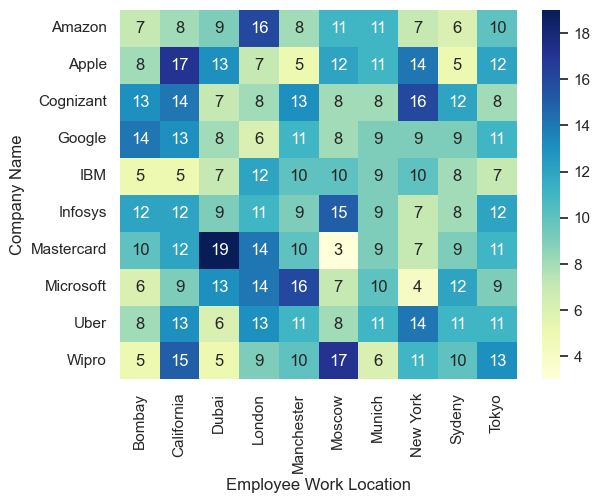

In [31]:
result = pd.crosstab(data["Company Name"], data["Employee Work Location"])
sns.heatmap(result, annot=True, fmt="d", cmap="YlGnBu")

C:\Users\Oreo\AppData\Local\Temp\ipykernel_172\2660699675.py:1: FutureWarning: The provided callable <function mean at 0x0000014DF52CFEC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result_crosstab = pd.crosstab(index = data["Company Name"],


<Axes: xlabel='Employment Status', ylabel='Company Name'>

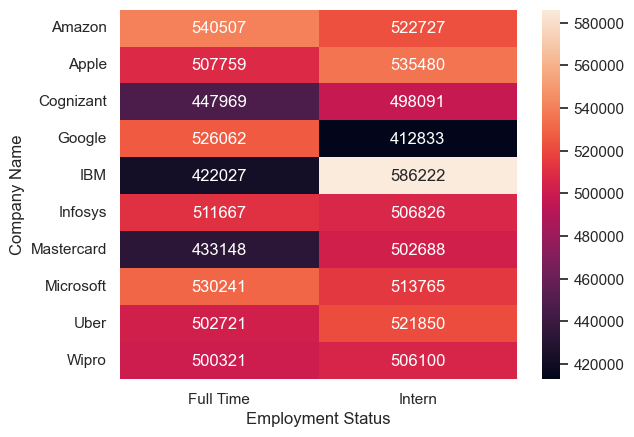

In [32]:
result_crosstab = pd.crosstab(index = data["Company Name"], 
                              columns=data["Employment Status"], 
                              values = data["Employee Salary"], 
                              aggfunc=np.mean)
                              
sns.heatmap(result_crosstab, annot = True, fmt = 'g')
# q: what is fmt ? 
# a: fmt is the string formatting code to use when adding annotations.
# q: what is annot ? 
# a: annot is a boolean value that controls whether to annotate the heatmap or not.
# q : what do you mean by annotate ? 
# a : annotate means to add textual annotations to the heatmap.

In [33]:
data.duplicated().sum() #duplicatied rows

0

In [34]:
data.duplicated(subset=["Company Name", "Employee Job Title"]).sum() #dupicated columns subsets 

900

## Function Overloading in python

In [35]:
from multipledispatch import dispatch 

@dispatch(int, int)
def add(a, b):
    return a + b

@dispatch(str, str)
def add(a, b):
    return a + b

@dispatch(float, float)
def add(a, b):
    return a + b

add(1, 2)



3

## KNN Imputator 

In [1]:
from sklearn.datasets import load_iris
import numpy as np 

In [4]:
data = load_iris().data

pos = []

for _ in range(10):
    i = np.random.randint(0, 150)
    j = np.random.randint(0, 4)
    print(f"Corrupting data at index {i} and column {j} : " , end = ' ')
    data[i, j] = np.nan
    print(data[i])
    pos.append((i,j))
   

Corrupting data at index 94 and column 1 :  [5.6 nan 4.2 1.3]
Corrupting data at index 43 and column 1 :  [5.  nan 1.6 0.6]
Corrupting data at index 37 and column 2 :  [4.9 3.6 nan 0.1]
Corrupting data at index 117 and column 2 :  [7.7 3.8 nan 2.2]
Corrupting data at index 0 and column 0 :  [nan 3.5 1.4 0.2]
Corrupting data at index 120 and column 0 :  [nan 3.2 5.7 2.3]
Corrupting data at index 135 and column 1 :  [7.7 nan 6.1 2.3]
Corrupting data at index 0 and column 3 :  [nan 3.5 1.4 nan]
Corrupting data at index 22 and column 1 :  [4.6 nan 1.  0.2]
Corrupting data at index 111 and column 2 :  [6.4 2.7 nan 1.9]


In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data)

In [6]:
data = load_iris().data

for i , j  in pos: 
    print(f"Original data at index {i} column {j} : ", data[i])
    print(f"Imputed data at index {i} column {j} : ", data_imputed[i])


Original data at index 94 column 1 :  [5.6 2.7 4.2 1.3]
Imputed data at index 94 column 1 :  [5.6 2.8 4.2 1.3]
Original data at index 43 column 1 :  [5.  3.5 1.6 0.6]
Imputed data at index 43 column 1 :  [5.   3.54 1.6  0.6 ]
Original data at index 37 column 2 :  [4.9 3.6 1.4 0.1]
Imputed data at index 37 column 2 :  [4.9 3.6 1.5 0.1]
Original data at index 117 column 2 :  [7.7 3.8 6.7 2.2]
Imputed data at index 117 column 2 :  [7.7  3.8  5.14 2.2 ]
Original data at index 0 column 0 :  [5.1 3.5 1.4 0.2]
Imputed data at index 0 column 0 :  [5.02 3.5  1.4  0.26]
Original data at index 120 column 0 :  [6.9 3.2 5.7 2.3]
Imputed data at index 120 column 0 :  [6.68 3.2  5.7  2.3 ]
Original data at index 135 column 1 :  [7.7 3.  6.1 2.3]
Imputed data at index 135 column 1 :  [7.7  3.44 6.1  2.3 ]
Original data at index 0 column 3 :  [5.1 3.5 1.4 0.2]
Imputed data at index 0 column 3 :  [5.02 3.5  1.4  0.26]
Original data at index 22 column 1 :  [4.6 3.6 1.  0.2]
Imputed data at index 22 colum

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)



In [8]:
data = load_iris().data

for i , j  in pos: 
    print(f"Original data at index {i} column {j} : ", data[i])
    print(f"Imputed data at index {i} column {j} : ", data_imputed[i])


Original data at index 94 column 1 :  [5.6 2.7 4.2 1.3]
Imputed data at index 94 column 1 :  [5.6 2.7 4.2 1.3]
Original data at index 43 column 1 :  [5.  3.5 1.6 0.6]
Imputed data at index 43 column 1 :  [5.  3.5 1.6 0.6]
Original data at index 37 column 2 :  [4.9 3.6 1.4 0.1]
Imputed data at index 37 column 2 :  [4.9 3.6 1.4 0.1]
Original data at index 117 column 2 :  [7.7 3.8 6.7 2.2]
Imputed data at index 117 column 2 :  [7.7 3.8 6.7 2.2]
Original data at index 0 column 0 :  [5.1 3.5 1.4 0.2]
Imputed data at index 0 column 0 :  [5.1 3.5 1.4 0.2]
Original data at index 120 column 0 :  [6.9 3.2 5.7 2.3]
Imputed data at index 120 column 0 :  [6.9 3.2 5.7 2.3]
Original data at index 135 column 1 :  [7.7 3.  6.1 2.3]
Imputed data at index 135 column 1 :  [7.7 3.  6.1 2.3]
Original data at index 0 column 3 :  [5.1 3.5 1.4 0.2]
Imputed data at index 0 column 3 :  [5.1 3.5 1.4 0.2]
Original data at index 22 column 1 :  [4.6 3.6 1.  0.2]
Imputed data at index 22 column 1 :  [4.6 3.6 1.  0.2]